# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [M Zilly Zunaidi]
- **Email:** [dzilly05@gmail.com]
- **ID Dicoding:** [zilly_zunaidi_PvE3]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

# Load Data
day_df = pd.read_csv('/content/drive/MyDrive/Bike/day.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Wrangling

### Gathering Data

In [7]:
day_df =  pd.read_csv('/content/drive/MyDrive/Bike/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df =  pd.read_csv('/content/drive/MyDrive/Bike/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [9]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
day_df.duplicated().sum()

0

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [15]:
hour_df.duplicated().sum()

0

In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [17]:
hour_df.dropna(inplace=True)

In [18]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
day_df.dropna(inplace=True)

In [20]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])

In [22]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [25]:
correlation_hour = hour_df.corr()
correlation_day = day_df.corr()

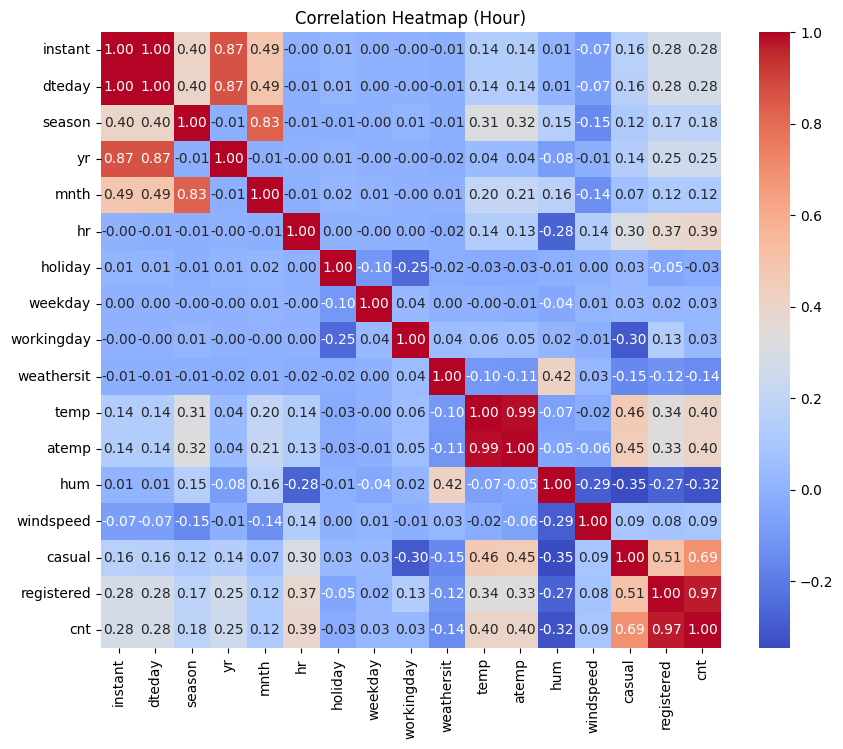

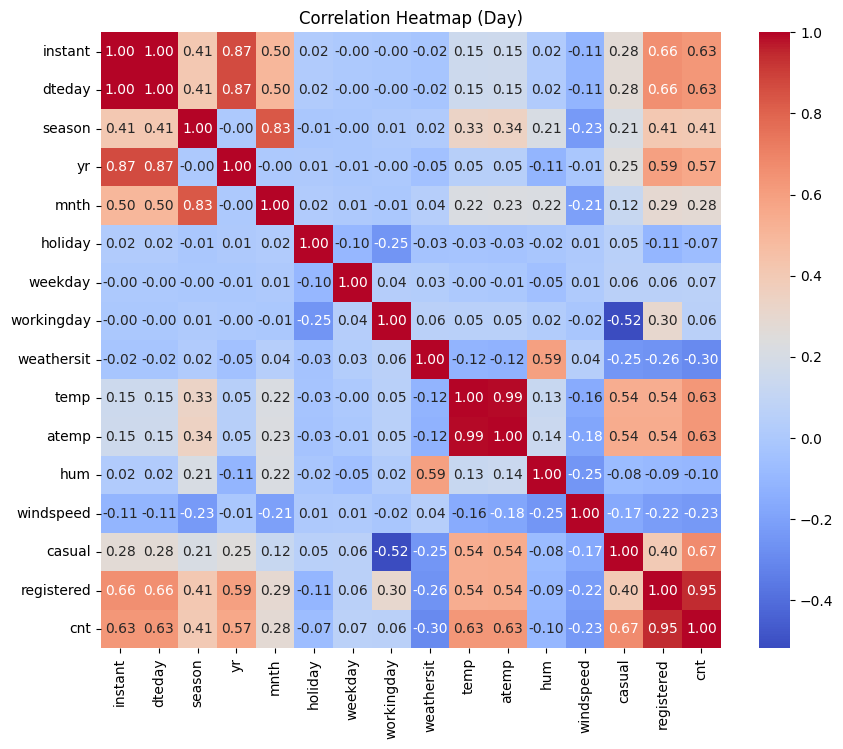

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_hour, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Hour)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_day, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Day)")
plt.show()

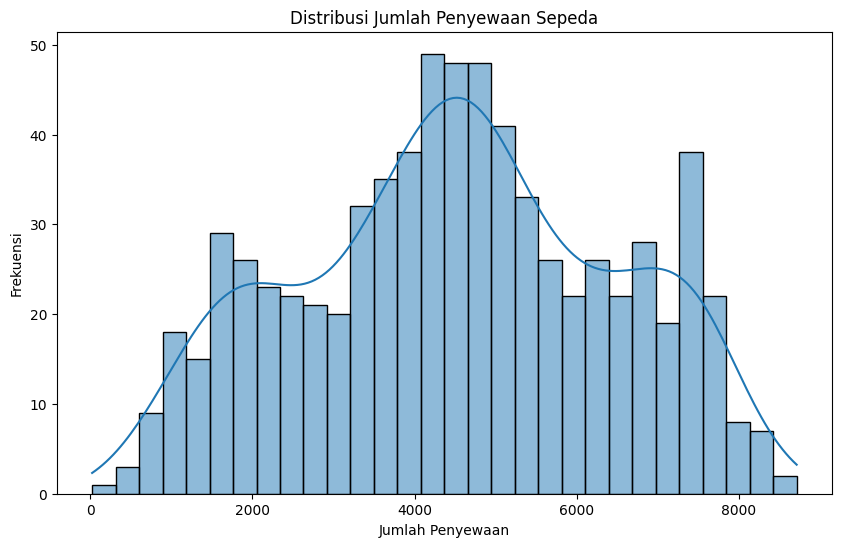

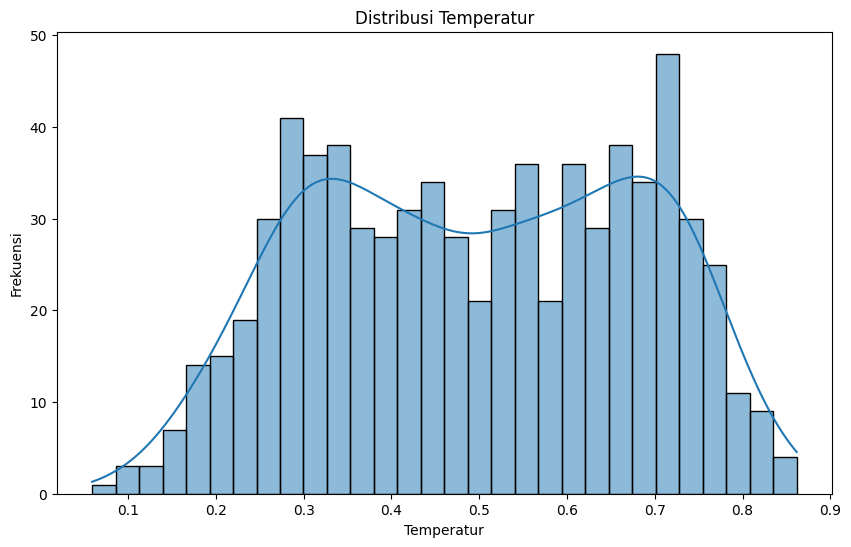

In [27]:
# Distribusi variabel 'cnt' (jumlah penyewaan)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi variabel 'temp' (temperatur ternormalisasi)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], bins=30, kde=True)
plt.title('Distribusi Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

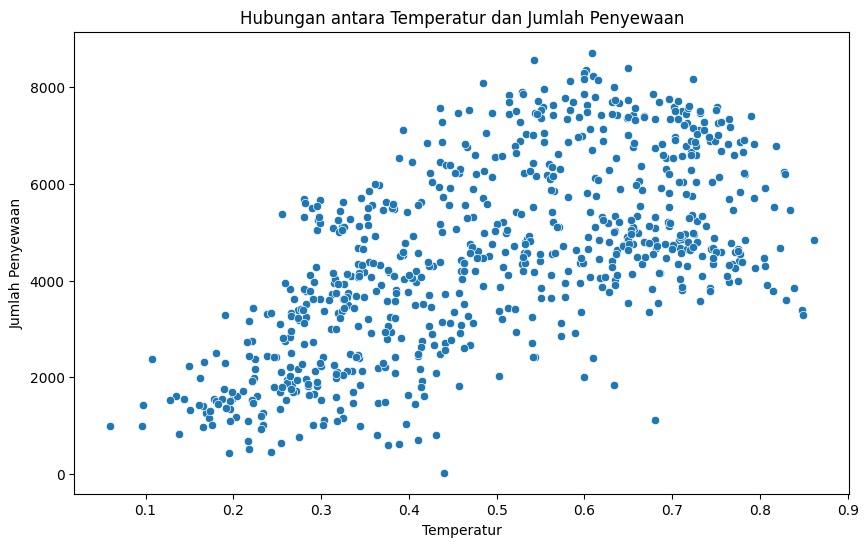

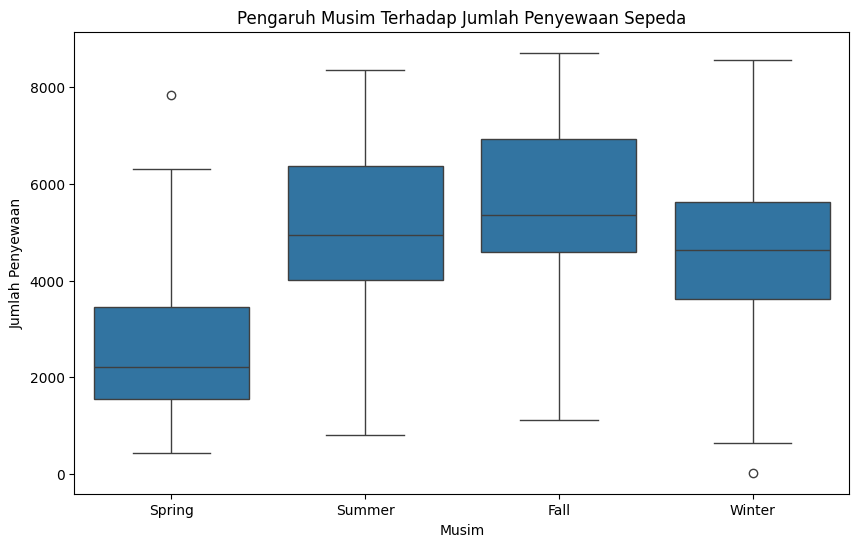

In [28]:
# Hubungan antara 'temp' dan 'cnt'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan antara Temperatur dan Jumlah Penyewaan')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Hubungan antara 'season' dan 'cnt' dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [29]:
# Statistik deskriptif untuk variabel numerik
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


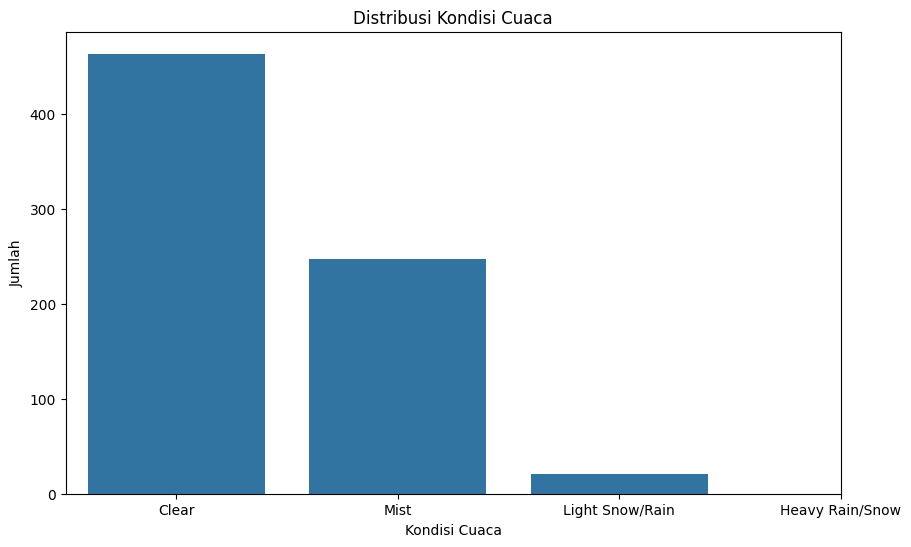

In [30]:
# Distribusi variabel 'weathersit' (kondisi cuaca)
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', data=day_df)
plt.title('Distribusi Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

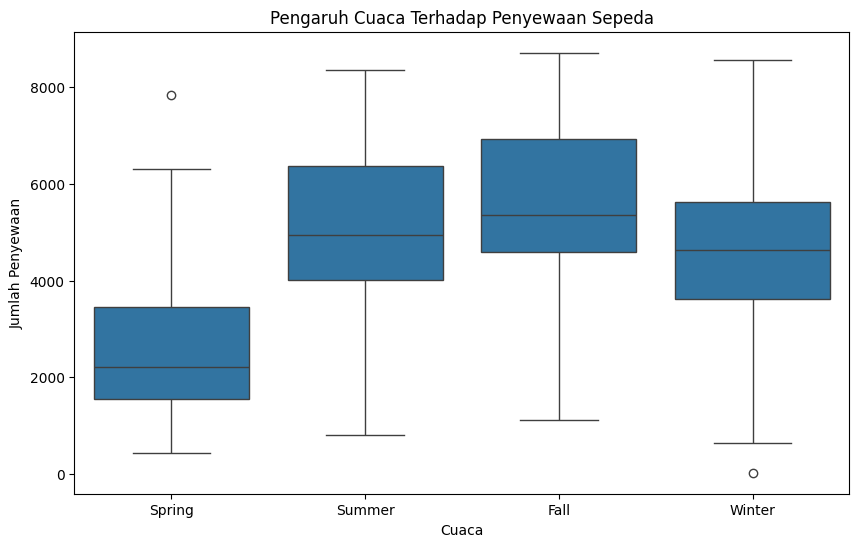

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca Terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2:

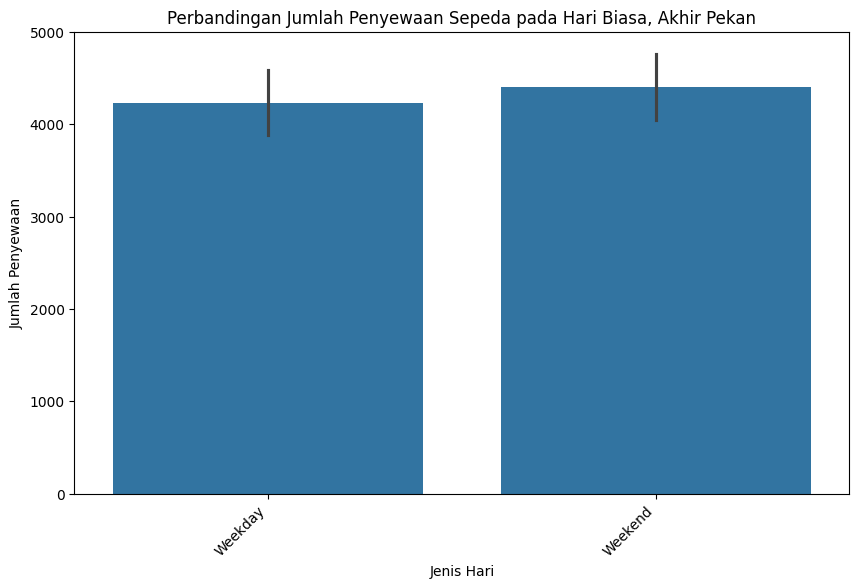

In [32]:
day_df['is_weekend'] = day_df['weekday']
# Assuming 'holiday' is the correct column name
day_df['is_holiday'] = day_df['holiday']

plt.figure(figsize=(10, 6))
#gabungan kolom
day_df['day_type'] = day_df['is_weekend'].astype(str) + day_df['is_holiday'].astype(str)
day_df['day_type'] = day_df['day_type'].map({'00': 'Weekday', '01': 'Holiday', '10': 'Weekend', '11': 'Weekend and Holiday'})


sns.barplot(x='day_type', y='cnt', data=day_df, order=['Weekday','Weekend']) #order=['Weekday','Weekend'])
plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Hari Biasa, Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45, ha='right')
plt.show()

## Conclusion

1. Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda:
Jawaban : Musim Gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas, musim semi, dan terkahit musim dingin dengan jumlah penyewaan terendah
Alasan : Hal ini dapat dikaitkan dengan kondisi cuaca yang lebih nyaman di musim gugur dan panas. Suhu yang sedang dan cuaca cerah cenderung mendorong orang untuk bersepeda
Rekomendasi : Perusahaan penyewaan sepeda dapat mengoptimalkan strategi pemasaran dan operasional mereka berdasarkan musim misalnya meningkatkan jumlah stok sepeda dan melakukan promosi pada musim gugur
  - Total sewa tertinggi terdapat pada musim gugur (fall) dengan nilai rata-rata 6000-7000 penyewaan per hari
  - Musim dingin (winter) memiliki jumlah penyewaan terendah dengan nilai rata-rata sekitar 2000-3000 penyewaan per hari
  - Terdapat perbedaan yang signifikan dalam jumlah penyewaan antara musim gugur dan musim dingin
2. Perbedaan Jumlah Penyewaan Sepeda Antara Hari Kerja dan Akhir Pekan
Jawaban : Jumlah penyewaan pada akhir pekan cenderung lebih tinggi dibandingkan dengan hari kerja
Alasan : Hal ini menunjukan bahwa sepeda lebih banyak digunakan untuk aktivitas rekreasi di akhir pekan, pada hari kerja sepeda jarang digunakan hal ini karena orang-orang cenderung menggunakan kendaraan pribadi atau transportasi umum.
Rekomendasi :  Perusahaan penyewaan sepeda dapat menawarkan paket khusus untuk akhir pekan atau hari libur untuk menarik lebih banyak pelanggan. Mereka juga dapat mempertimbangkan untuk menambah titik penyewaan di lokasi-lokasi rekreasi populer.
  - Rata-rata jumlah penyewaan pada akhir pekan sekitar 4500-5000 penyewaan per hari.
  = Rata-rata jumlah penyewaan pada hari kerja sekitar 4000-4500 penyewaan per hari.
  - Perbedaan jumlah penyewaan antara hari kerja dan akhir pekan tidak sebesar perbedaan jumlah penyewaan antar musim.